<a href="https://colab.research.google.com/github/Tijan01/UAS/blob/main/tubes_psd_uas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 KB 4.8 MB/s eta 0:00:00


In [2]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
from csv import writer
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/data_coloum.csv')
df.count()

Unnamed: 0      2799
Unnamed: 0.1    2799
Date            2799
User            2799
Tweet           2799
dtype: int64

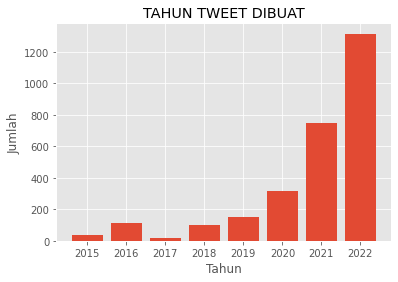

In [ ]:
data_tahun = df.groupby(by="Date").count()
data_tahun

x = list(data_tahun.index)
y = list(data_tahun['Unnamed: 0'].values)


plt.style.use('ggplot')
plt.title('TAHUN TWEET DIBUAT')
plt.xlabel('Tahun')
plt.ylabel('Jumlah')
plt.bar(x,y)
plt.show()

In [ ]:
df[df.Tweet.str.contains('Andalas')]

,Unnamed: 0,Unnamed: 0.1,Date,User,Tweet
1,1,1,2022,suaradotcom,"Menteri PPPA, Bintang Puspayoga mengutuk keras..."
2,2,2,2022,Metro_TV,Ratusan mahasiswa berunjuk rasa di depan Gedun...
3,3,3,2022,AuisGrand,Pihak kepolisian belum bisa memproses hukum do...
4,4,4,2022,KompasKlasika,Pihak kepolisian belum bisa memproses hukum do...
5,5,5,2022,hariankompas,Pihak kepolisian belum bisa memproses hukum do...
6,6,6,2022,kompasmuda,Salah satu dosen Fakultas Ilmu Budaya Universi...
7,7,7,2022,Metro_TV,Sebanyak delapan mahasiswi Universitas Andalas...
8,8,8,2022,tauberitamedia,Dugaan tindak pelecehan seksual yang dilakukan...
9,9,9,2022,yunankingstar1,https://t.co/J3BwFevo0x\n\nOknum dosen Univers...
10,10,10,2022,batitong050501,https://t.co/8CJm6N5DAE\n\nOknum dosen Univers...


In [ ]:
searchfor = ['laki','Laki','Laki-laki','pria','Pria']
df["Bool"] = df['Tweet'].apply(lambda x: 1 if any(i in x for i in searchfor) else 0)
df_men = df.loc[df['Bool'] == 1]
df_men.count()

Unnamed: 0      16
Unnamed: 0.1    16
Date            16
User            16
Tweet           16
label           16
Bool            16
dtype: int64

In [ ]:
searchfor = ['wanita','Wanita','perempuan','Perempuan','gadis']
df["Bool"] = df['Tweet'].apply(lambda x: 1 if any(i in x for i in searchfor) else 0)
df_women = df.loc[df['Bool'] == 1]
df_women.count()

Unnamed: 0      123
Unnamed: 0.1    123
Date            123
User            123
Tweet           123
label           123
Bool            123
dtype: int64

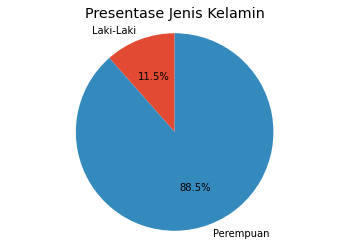

In [ ]:
plt.title('Presentase Jenis Kelamin dalam Twit yang ada di tiwiter mengenai pelecehan sekesual')
plt.pie(
    [df_men.shape[0], df_women.shape[0]],
    labels=['Laki-Laki','Perempuan'],
    autopct='%1.1f%%',
    startangle=90
    )
plt.axis('equal')
plt.grid(True) # garis background untuk mempermudah pembacaan
plt.show()

In [ ]:
searchfor =['Universitas Negeri Semarang','negeri semarang']
df["label"] = df['Tweet'].apply(lambda x: 'UNS' if any(i in x for i in searchfor) else 0)
df_uns = df.loc[df['label'] == 'UNS']
df_uns.count()

Unnamed: 0      216
Unnamed: 0.1    216
Date            216
User            216
Tweet           216
label           216
dtype: int64

In [ ]:
df_uns


,Unnamed: 0,Unnamed: 0.1,Date,User,Tweet,label
365,365,366,2022,AryaPut28466078,Halo!saya Arya Putra Nugraha dari jurusan Pend...,UNS
366,366,367,2022,NatasyaRumayauw,"Hallo Mahesa, Perkenalkan Saya (natasya ribka ...",UNS
367,367,368,2022,rrqbenjol121,Halo mahesa. Aku jayson Nicholas dari universi...,UNS
368,368,369,2022,afiliawidya,Halo Mahesa!\nSaya Afilia Widyasuma Prodi Ilmu...,UNS
369,369,370,2022,4dam_02,Hai guys!!! aku Adam Sayyid Siddiq dari Univer...,UNS
...,...,...,...,...,...,...
2387,2387,1081,2021,HopehelpsUnnes,Let Hope Helps You\n\n#HopeHelpsUNNES\n#HopeHe...,UNS
2393,2393,1089,2021,HopehelpsUnnes,Telah hadir hotline HopeHelps Universitas Nege...,UNS
2566,2566,1299,2020,sunflowersaiddd,tanggapan terkait kekerasan seksual. Kuesioner...,UNS
2567,2567,1300,2020,sunflowersaiddd,[Kajian Riset Suara Mahasiswa mengenai Kekeras...,UNS


In [ ]:
df.groupby(['label']).count()

,Unnamed: 0,Unnamed: 0.1,Date,User,Tweet,label
2,2,2,2022,Metro_TV,Ratusan mahasiswa berunjuk rasa di depan Gedun...,Universitas Andalas
3,3,3,2022,AuisGrand,Pihak kepolisian belum bisa memproses hukum do...,Universitas Andalas
4,4,4,2022,KompasKlasika,Pihak kepolisian belum bisa memproses hukum do...,Universitas Andalas
5,5,5,2022,hariankompas,Pihak kepolisian belum bisa memproses hukum do...,Universitas Andalas
6,6,6,2022,kompasmuda,Salah satu dosen Fakultas Ilmu Budaya Universi...,Universitas Andalas
...,...,...,...,...,...,...
1422,1422,25,2022,daffa_azrial,Pelaku Kekerasan Seksual yang Terjadi di Unive...,Universitas Gunadarma
1934,1934,588,2022,bemfpsikologiUG,BEM Fakultas Ilmu Komunikasi Universitas Gunad...,Universitas Gunadarma
1949,1949,604,2022,ruangteras19,Gunadarma Talkshow (G-Talk) 2022 adalah sebuah...,Universitas Gunadarma
1953,1953,608,2022,30Berlianna,Mahasiswa Fakultas Ekonomi Universitas Gunadar...,Universitas Gunadarma


In [ ]:
searchfor =['Universitas Gunadarma', 'gundar']
df["label"] = df['Tweet'].apply(lambda x: 'Universitas Gunadarma' if any(i in x for i in searchfor) else 0)
df_gundar = df.loc[df['label'] == 'Universitas Gunadarma']
df_gundar.count()

Unnamed: 0      142
Unnamed: 0.1    142
Date            142
User            142
Tweet           142
label           142
dtype: int64

In [ ]:
df.groupby(['label']).count()

,Unnamed: 0,Unnamed: 0.1,Date,User,Tweet
label,,,,,
0,2655,2655,2655,2655,2655
Universitas Gunadarma,142,142,142,142,142


In [ ]:
searchfor =['Universitas Andalas', 'andalas']
df["label"] = df['Tweet'].apply(lambda x: 'Universitas Andalas' if any(i in x for i in searchfor) else 0)
# df = df.drop(columns='Bool')
df_andalas = df.loc[df['label'] == 'Universitas Andalas']
df_andalas.count()

Unnamed: 0      45
Unnamed: 0.1    45
Date            45
User            45
Tweet           45
label           45
dtype: int64

In [ ]:
# df_univ = pd.concat([df_andalas, df_uns,df_gundar])

data_univ = df_univ.groupby(by="label").count()

y= list(df_univ.index)
x = list(df_univ['label'].values)


plt.style.use('ggplot')
plt.title('UNIVERSITAS PADA TWEET')
plt.xlabel('Nama Universitas')
plt.ylabel('Jumlah')
plt.bar(x,y)
plt.show()


AttributeError: ignored

In [ ]:
data_univ = df_univ.groupby(by="label").count()
data_univ

,Unnamed: 0,Unnamed: 0.1,Date,User,Tweet
label,,,,,
UNS,216,216,216,216,216
Universitas Andalas,45,45,45,45,45
Universitas Gunadarma,142,142,142,142,142


In [ ]:
df_univ.count()

Unnamed: 0      403
Unnamed: 0.1    403
Date            403
User            403
Tweet           403
label           403
dtype: int64

,Unnamed: 0,Unnamed: 0.1,Date,User,Tweet
label,,,,,
UNS,216,216,216,216,216
Universitas Andalas,45,45,45,45,45
Universitas Gunadarma,142,142,142,142,142
